# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load dataset and split into Train set and Test set

In [2]:
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [3]:
print(X_train[0])

[ 0.99093279 -1.43980862]


# Visualize Dataset

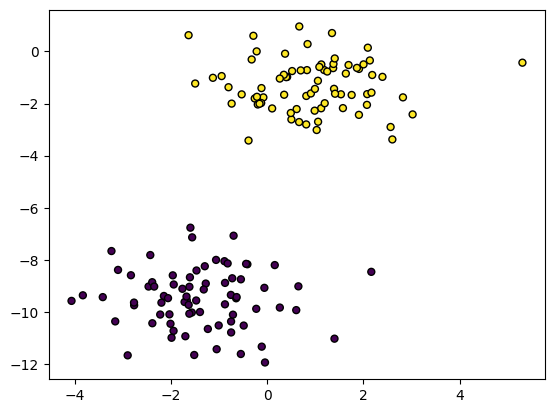

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=25, edgecolor='k')

# Implement Perceptron

In [6]:
class Perceptron:
  def __init__(self, lr = 0.001, n_iters = 1000):
    self.lr = lr
    self.n_iters = n_iters
    self.activation_func = self._unit_step_function
    self.weights = None
    self.bias = None

  def _unit_step_function(self, x):
    return np.where(x >= 0, 1, 0)

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    y_ = np.array([1 if i > 0 else 0 for i in y])

    for i in range(self.n_iters):
      for idx, x_i in enumerate(X):
        z = np.dot(x_i, self.weights) + self.bias
        y_pred = self.activation_func(z)

        delta_w = self.lr * (y[idx] - y_pred) * x_i
        self.weights += delta_w

        delta_b = self.lr * (y[idx] - y_pred)
        self.bias += delta_b

  def predict(self, X):
    z = np.dot(X, self.weights) + self.bias
    y_pred = self.activation_func(z)
    return y_pred

#Inference

In [7]:
classification = Perceptron()
classification.fit(X_train, y_train)
y_pred = classification.predict(X_test)

In [8]:
def accuracy(y_pred, y_true):
  acc = np.sum(y_pred == y_true) / len(y_true)
  return acc
print(accuracy(y_pred, y_test))

1.0
